**Importing Essential Libraries**

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras import datasets, layers, models
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.svm import SVC
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix , classification_report
import warnings
warnings.filterwarnings("ignore")

**Loading Dataset**

In [2]:
data_train = pd.read_csv("/content/drive/MyDrive/Work/Thesis/mitbih_train.csv", header=None)
data_test = pd.read_csv("/content/drive/MyDrive/Work/Thesis/mitbih_test.csv", header=None)

In [3]:
data_test.drop(data_test[data_test[187] == 0].index, inplace = True)

In [4]:
data = pd.concat([ data_train, data_test ], axis=0)

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21891,0.973970,0.913232,0.865510,0.823210,0.746204,0.642082,0.547722,0.426247,0.325380,0.279826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


**Data Analysis**

In [7]:
data.shape

(91328, 188)

In [8]:
data = data.sort_values([187], axis=0)

In [9]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48306,0.872881,0.754237,0.317797,0.088983,0.084746,0.093220,0.055085,0.046610,0.038136,0.033898,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48307,0.967213,0.885246,0.311475,0.000000,0.102004,0.109290,0.105647,0.094718,0.092896,0.100182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48308,1.000000,0.513587,0.116848,0.073370,0.095109,0.067935,0.081522,0.062500,0.073370,0.065217,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48309,0.949622,0.891688,0.763224,0.319899,0.098237,0.128463,0.141058,0.062972,0.032746,0.017632,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


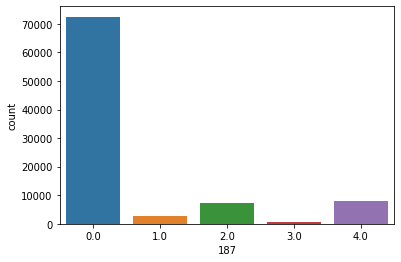

In [10]:
sns.countplot(x=data.columns[-1], data=data)

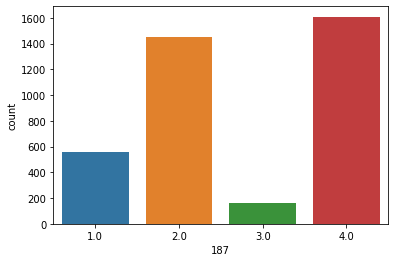

In [11]:
sns.countplot(x=data.columns[-1], data=data_test)

In [12]:
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]
X = np.array(X)
y = np.array(y)

In [13]:
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (91328, 187)
Shape of y: (91328,)


**Plotting Signals From The Dataset**

In [14]:
C0 = np.argwhere(y == 0).flatten()
C1 = np.argwhere(y == 1).flatten()
C2 = np.argwhere(y == 2).flatten()
C3 = np.argwhere(y == 3).flatten()
C4 = np.argwhere(y == 4).flatten()

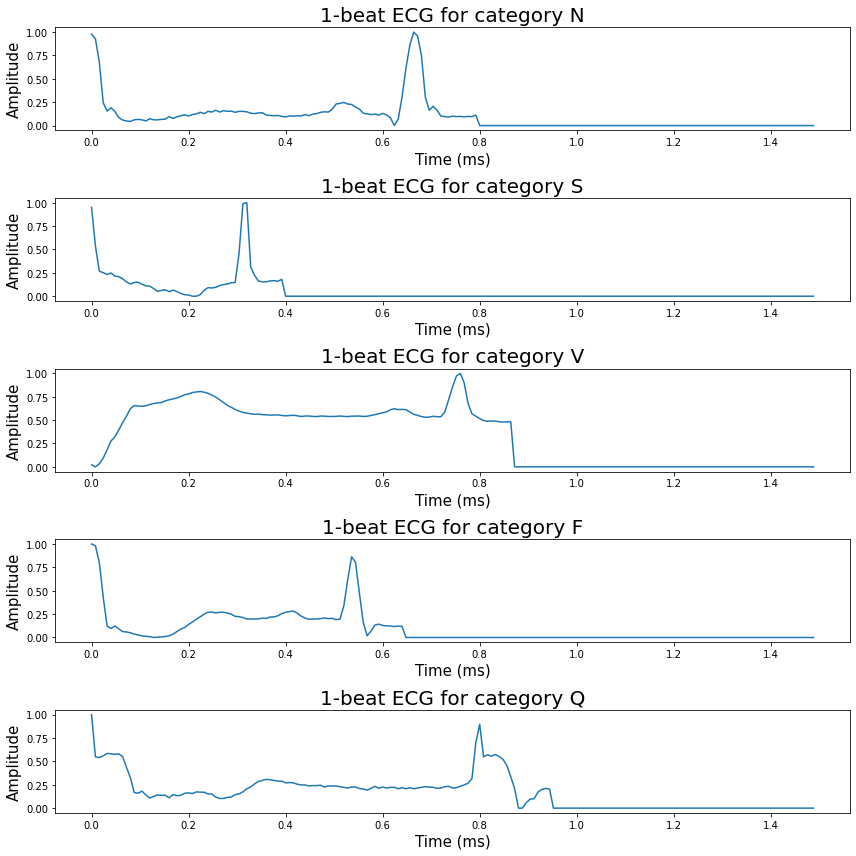

In [15]:
x = np.arange(0, 187)*8/1000

plt.figure(figsize=(12,12))
plt.subplot(5, 1, 1)

plt.plot(x, X[C0, :][0], label="Cat. N")
plt.title("1-beat ECG for category N", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)

plt.subplot(5,1,2)
plt.plot(x, X[C1, :][0], label="Cat. S")
plt.title("1-beat ECG for category S", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)

plt.subplot(5,1,3)
plt.plot(x, X[C2, :][0], label="Cat. V")
plt.title("1-beat ECG for category V", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)

plt.subplot(5,1, 4)
plt.plot(x, X[C3, :][0], label="Cat. F")
plt.title("1-beat ECG for category F", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)

plt.subplot(5,1,5)
plt.plot(x, X[C4, :][0], label="Cat. Q")
plt.title("1-beat ECG for category Q", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.tight_layout()
plt.show()

**Balancing the Imbalance Dataset**

In [16]:
data[187] = data[187].astype('int')

In [17]:
data[187].unique()

array([0, 1, 2, 3, 4])

In [18]:
data[187].value_counts()

0    72471
4     8039
2     7236
1     2779
3      803
Name: 187, dtype: int64

In [19]:
zero = data[data[187]==0].sample(10000)

In [20]:
data.drop(data[data[187]==0].index, inplace=True)

In [21]:
data.shape

(15083, 188)

In [22]:
data = pd.concat([zero, data], axis=0)

In [23]:
data.shape

(25083, 188)

In [24]:
one = data[data[187]==1].sample(10000, replace=True)

In [25]:
data.drop(data[data[187]==1].index, inplace=True)

In [26]:
data = pd.concat([one, data], axis=0)

In [27]:
data.shape

(32860, 188)

In [28]:
two = data[data[187]==2].sample(10000, replace=True)

In [29]:
data.drop(data[data[187]==2].index, inplace=True)

In [30]:
data = pd.concat([two, data], axis=0)

In [31]:
data.shape

(37072, 188)

In [32]:
three = data[data[187]==3].sample(10000, replace=True)

In [33]:
data.drop(data[data[187]==3].index, inplace=True)

In [34]:
data = pd.concat([three, data], axis=0)

In [35]:
data.shape

(46431, 188)

In [36]:
four = data[data[187]==4].sample(10000, replace=True)

In [37]:
data.drop(data[data[187]==4].index, inplace=True)

In [38]:
data = pd.concat([four, data], axis=0)

In [39]:
data.shape

(50000, 188)

**Data are now balanced**

In [40]:
data[187].value_counts()

4    10000
3    10000
2    10000
1    10000
0    10000
Name: 187, dtype: int64

In [41]:
data = data.sort_values([187], axis=0)

In [42]:
X = data.drop(187, axis=1)
y = data[187]

In [43]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
15534,0.000000,0.213889,0.369444,0.480556,0.522222,0.516667,0.547222,0.547222,0.544444,0.558333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1137,0.968000,0.960000,0.408000,0.126000,0.036000,0.014000,0.040000,0.070000,0.158000,0.322000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58634,0.919614,0.858521,0.212219,0.000000,0.147910,0.234727,0.237942,0.237942,0.234727,0.241158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63097,1.000000,0.602190,0.029197,0.087591,0.087591,0.102190,0.080292,0.094891,0.080292,0.083942,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46526,1.000000,0.813008,0.528455,0.081301,0.000000,0.093496,0.138211,0.089431,0.065041,0.052846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
y.head()

15534    0
1137     0
58634    0
63097    0
46526    0
Name: 187, dtype: int64

**Spltting Data**

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [46]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

**Hyper Parameter Tunning**

In [51]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
          
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}


In [52]:
scores = []
best_estimators = {}
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[model_name] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.855625,"{'C': 20, 'kernel': 'rbf'}"
1,random_forest,0.981550,{'n_estimators': 10}
2,logistic_regression,0.772975,{'C': 10}
3,naive_bayes_gaussian,0.420325,{}
4,naive_bayes_multinomial,0.510900,{}
5,decision_tree,0.965250,{'criterion': 'entropy'}


**It can be shown that random forest has the highest score among all classifiers. So that it will be chosen for model construction.**

In [53]:
best_clf = best_estimators['random_forest']

**Evaluating Model Performance**

**Training Accuracy**

In [57]:
best_clf.score(X_train, y_train)

0.99965

**Testing Accuracy**

In [58]:
best_clf.score(X_test, y_test)

0.9862

**Classification Report Using Random Forest**

In [54]:
y_pred = best_clf.predict(X_test)

In [55]:
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2000
           1       0.98      0.99      0.99      2000
           2       0.99      0.98      0.98      2000
           3       1.00      1.00      1.00      2000
           4       0.99      0.99      0.99      2000

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



**Saving the Model**

In [56]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, '/content/drive/MyDrive/Work/Thesis/saved_model.pkl') 

['/content/drive/MyDrive/Work/Thesis/saved_model.pkl']